In [1]:
import operator
from langgraph.graph import StateGraph,START,END
from typing import Annotated,List,TypedDict
from IPython.display import display,Image

In [2]:
class State(TypedDict):
    messages : Annotated[List[str],operator.add]

In [3]:
builder = StateGraph(State)

In [4]:
class ReturnNodeValue:
    def __init__(self,value:str):
        self.value = value

    def __call__(self,state:State)->dict:
        return {"messages" : [self.value]}

In [5]:
builder.add_node("a",ReturnNodeValue("Hello"))
builder.add_node("b",ReturnNodeValue("World"))

In [6]:
builder.set_entry_point("a")

builder.add_edge("a","b")
builder.add_edge("b",END)

In [7]:
graph = builder.compile()

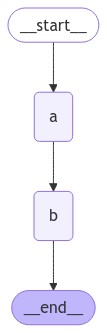

In [8]:
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [9]:
input_state = {"messages" : []}
result = graph.invoke(input_state)

In [10]:
print(result)

{'messages': ['Hello', 'World']}
